In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [2]:
pd.set_option('display.max_colwidth', None)  # Show full width of each cell

In [3]:
df_europapark = pd.read_parquet("../data/processed/ep/merged_with_ride_features.parquet")
df_europapark

,ride_name,timestamp,wait_time,closed,temperature,rain,wind,is_german_holiday,is_swiss_holiday,is_french_holiday,feature_attraction_type,feature_category,feature_max_height,feature_track_length,feature_max_speed,feature_g_force,feature_min_age,feature_min_height,feature_capacity_per_hour
0,alpine express enzian,2017-05-23 09:00:00,1.0,False,18.7,0.0,1.1,False,False,False,Powered Coaster,family,6.0,430.0,35.0,1.5,4.0,95.0,900.0
1,poppy towers,2017-05-23 09:00:00,0.0,False,18.7,0.0,1.1,False,False,False,Children's Drop Tower,children,8.0,NaN,15.0,1.5,4.0,100.0,500.0
2,silver star,2017-05-23 09:00:00,0.0,False,18.7,0.0,1.1,False,False,False,Hyper Coaster,thrill,73.0,1620.0,127.0,4.0,8.0,140.0,1750.0
3,swiss bob run,2017-05-23 09:00:00,1.0,False,18.7,0.0,1.1,False,False,False,Bobsled Coaster,family,20.0,500.0,65.0,2.8,6.0,120.0,1200.0
4,tirol log flume,2017-05-23 09:00:00,1.0,False,18.7,0.0,1.1,False,False,False,Log Flume,water,22.0,600.0,50.0,2.0,4.0,100.0,1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14196898,fjordrafting,2024-12-31 21:00:00,0.0,True,NaN,NaN,NaN,False,False,False,River Rapids,water,8.0,450.0,20.0,1.5,4.0,110.0,1800.0
14196899,jim button journey through morrowland,2024-12-31 21:00:00,0.0,True,NaN,NaN,NaN,False,False,False,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14196900,josefinas magical imperial journey,2024-12-31 21:00:00,0.0,True,NaN,NaN,NaN,False,False,False,Dark Boat Ride,family,5.0,380.0,8.0,1.0,0.0,0.0,1200.0
14196901,madame freudenreich curiosits,2024-12-31 21:00:00,0.0,True,NaN,NaN,NaN,False,False,False,Dark Ride,family,6.0,250.0,8.0,1.0,0.0,0.0,700.0


# Basic Information

In [4]:
df_europapark["ride_name"].nunique()

35

In [5]:
df_europapark['timestamp'] = pd.to_datetime(df_europapark['timestamp'])
df_europapark = df_europapark.sort_values(by=['ride_name', 'timestamp'])
df_europapark['missing_wait'] = df_europapark['wait_time'].isna()


sequence_lengths = []
current_length = 0

for _, row in df_europapark.iterrows():
    if row['missing_wait']:
        current_length += 1
    else:
        if current_length > 0:
            sequence_lengths.append(current_length)
        current_length = 0

if current_length > 0:
    sequence_lengths.append(current_length)



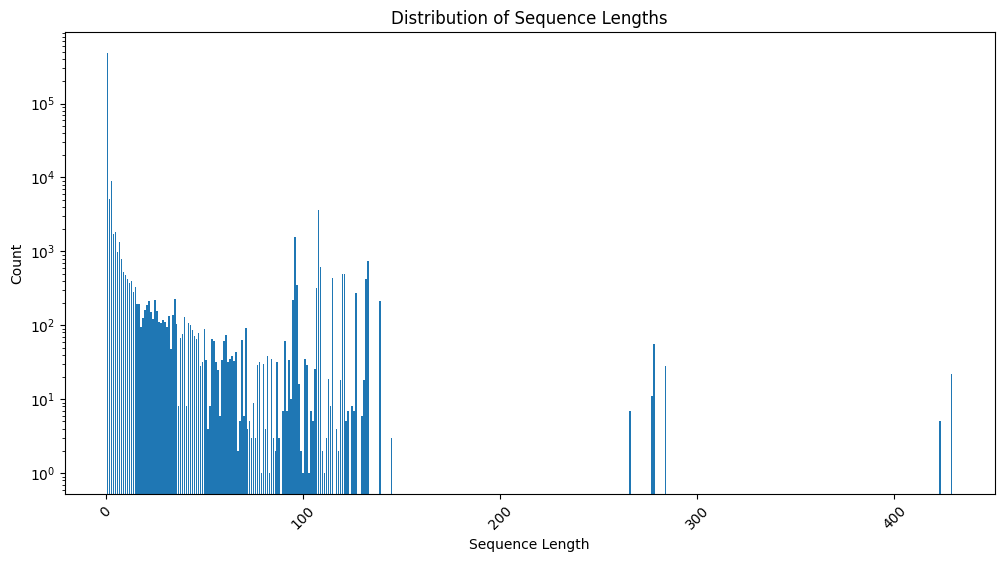

In [6]:
sequence_lengths = pd.DataFrame(sequence_lengths).sort_index()
sequence_counts = sequence_lengths.value_counts().reset_index()
sequence_counts.columns = ['Sequence Length', 'Count']
sequence_counts = sequence_counts.sort_values(by="Sequence Length")

plt.figure(figsize=(12, 6))
plt.bar(sequence_counts["Sequence Length"], sequence_counts["Count"])
plt.xlabel("Sequence Length")
plt.ylabel("Count")
plt.title("Distribution of Sequence Lengths")
plt.yscale("log") 
plt.xticks(rotation=45)
plt.show()


In [7]:
df_europapark

,ride_name,timestamp,wait_time,closed,temperature,rain,wind,is_german_holiday,is_swiss_holiday,is_french_holiday,feature_attraction_type,feature_category,feature_max_height,feature_track_length,feature_max_speed,feature_g_force,feature_min_age,feature_min_height,feature_capacity_per_hour,missing_wait
0,alpine express enzian,2017-05-23 09:00:00,1.0,False,18.7,0.0,1.1,False,False,False,Powered Coaster,family,6.0,430.0,35.0,1.5,4.0,95.0,900.0,False
61,alpine express enzian,2017-05-23 09:05:00,NaN,False,18.7,0.0,1.1,False,False,False,Powered Coaster,family,6.0,430.0,35.0,1.5,4.0,95.0,900.0,True
90,alpine express enzian,2017-05-23 09:10:00,1.0,False,18.7,0.0,1.1,False,False,False,Powered Coaster,family,6.0,430.0,35.0,1.5,4.0,95.0,900.0,False
131,alpine express enzian,2017-05-23 09:15:00,NaN,False,18.7,0.0,1.1,False,False,False,Powered Coaster,family,6.0,430.0,35.0,1.5,4.0,95.0,900.0,True
159,alpine express enzian,2017-05-23 09:20:00,1.0,False,18.7,0.0,1.1,False,False,False,Powered Coaster,family,6.0,430.0,35.0,1.5,4.0,95.0,900.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14196735,whale adventures northern lights,2024-12-31 20:40:00,0.0,True,NaN,NaN,NaN,False,False,False,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
14196773,whale adventures northern lights,2024-12-31 20:45:00,0.0,True,NaN,NaN,NaN,False,False,False,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
14196807,whale adventures northern lights,2024-12-31 20:50:00,0.0,True,NaN,NaN,NaN,False,False,False,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
14196840,whale adventures northern lights,2024-12-31 20:55:00,0.0,True,NaN,NaN,NaN,False,False,False,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [8]:
empty_count = df_europapark['wait_time'].isna().sum()
print("Total Wait Time empty_count: " +  str(empty_count))
print("Total Wait Time empty_percentage: " +  str(len(df_europapark)/empty_count))


# For now I'm dropping the empty Values but we will discuss on what to do with them. Probably fill with the mean based on ride, hour and season.
df_europapark.dropna(subset=['wait_time'], inplace=True)

Total Wait Time empty_count: 1929048
Total Wait Time empty_percentage: 7.35953848737823


# Wait Time Distribution

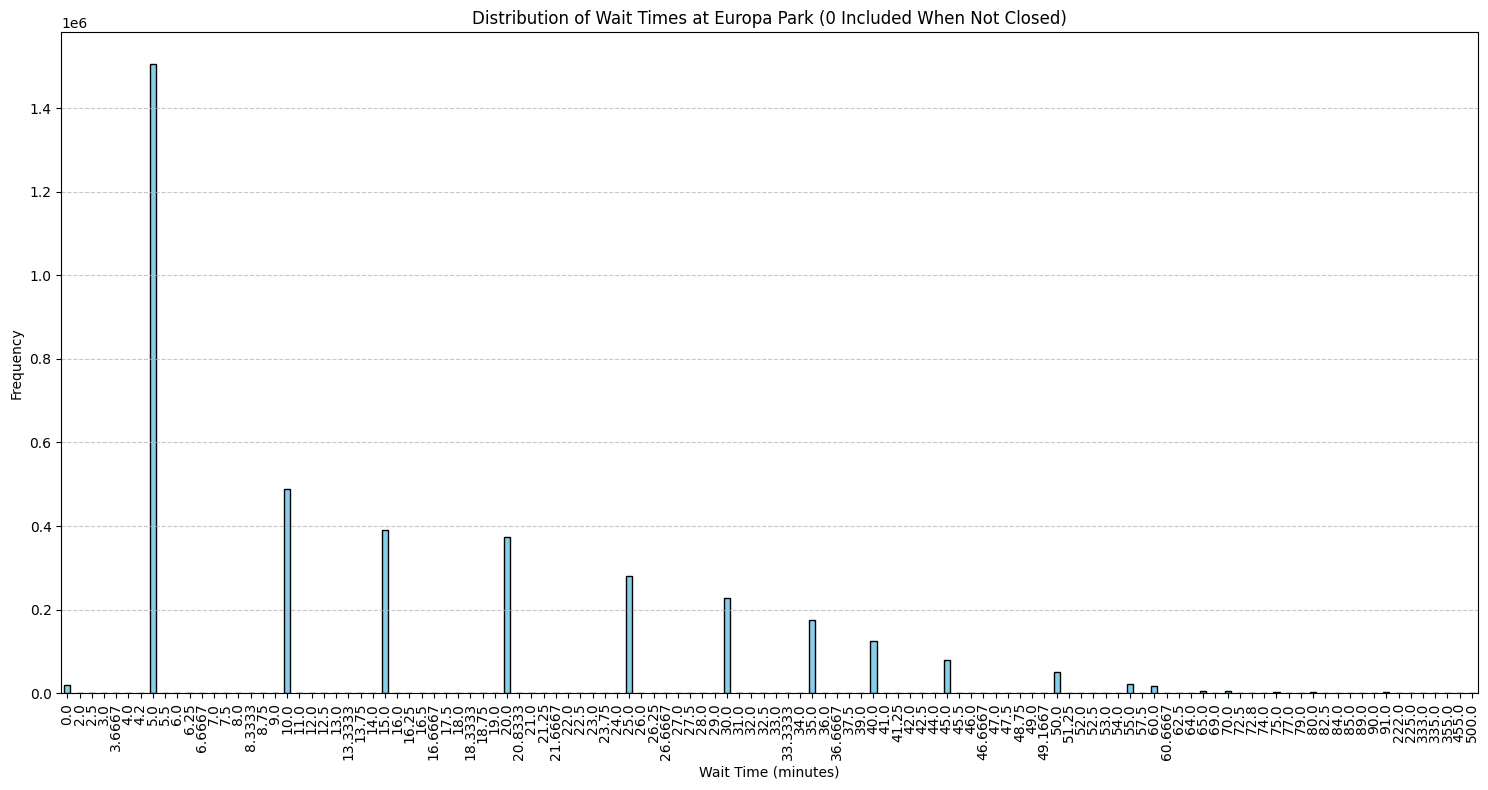

Total wait time entries (including valid 0s): 3776997
Number of unique wait times: 116
Most common wait time: 5.0 minutes (frequency: 1505977)
Longest wait time: 500.0 minutes


In [9]:
df_filtered = df_europapark[(df_europapark["wait_time"] > 1) | ((df_europapark["wait_time"] == 0) & (df_europapark["closed"] == False))]
wait_time_counts = df_filtered["wait_time"].value_counts().sort_index()

plt.figure(figsize=(15, 8))
wait_time_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Wait Times at Europa Park (0 Included When Not Closed)')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(f"Total wait time entries (including valid 0s): {wait_time_counts.sum()}")
print(f"Number of unique wait times: {len(wait_time_counts)}")
print(f"Most common wait time: {wait_time_counts.idxmax()} minutes (frequency: {wait_time_counts.max()})")
print(f"Longest wait time: {wait_time_counts.index.max()} minutes")


In [10]:
wait_time_counts = df_europapark[(df_europapark["wait_time"] > 1) | ((df_europapark["wait_time"] == 0) & (df_europapark["closed"] == False))]["wait_time"].value_counts().sort_index()
non_divisible_by_5 = sum(count for wait_time, count in wait_time_counts.items() if wait_time % 5 != 0)

total = wait_time_counts.sum()
percentage = (non_divisible_by_5 / total) * 100

print(f"Entries not divisible by 5: {non_divisible_by_5}")
print(f"Percentage of total: {percentage:.2f}%")


Entries not divisible by 5: 3516
Percentage of total: 0.09%


Therefore we can probably clip those 0.09% to the next number which is dividable by 5

Entries not divisible by 5 after rounding: 0
Percentage of total after rounding: 0.00%


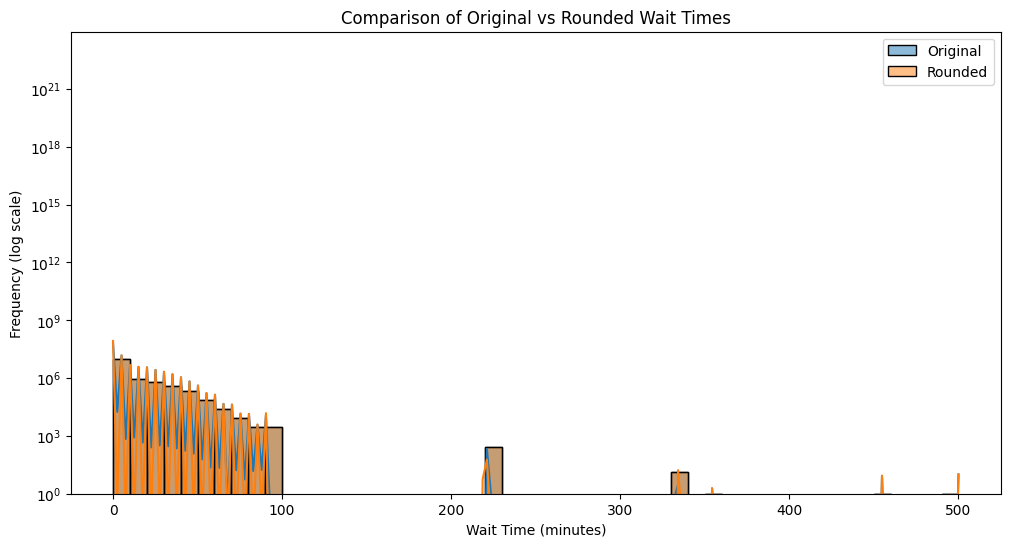

In [11]:
def round_to_nearest_5(x):
    return 5 * round(x/5)

df_europapark['wait_time_rounded'] = df_europapark['wait_time'].apply(round_to_nearest_5)

wait_time_counts_rounded = df_europapark[(df_europapark["wait_time"] > 1) | ((df_europapark["wait_time"] == 0) & (df_europapark["closed"] == False))]["wait_time_rounded"].value_counts().sort_index()
non_divisible_by_5 = sum(count for wait_time, count in wait_time_counts_rounded.items() if wait_time % 5 != 0)

total_rounded = wait_time_counts_rounded.sum()
percentage_rounded = (non_divisible_by_5 / total_rounded) * 100

print(f"Entries not divisible by 5 after rounding: {non_divisible_by_5}")
print(f"Percentage of total after rounding: {percentage_rounded:.2f}%")

plt.figure(figsize=(12, 6))
sns.histplot(df_europapark['wait_time'], kde=True, label='Original', alpha=0.5, bins=50)
sns.histplot(df_europapark['wait_time_rounded'], kde=True, label='Rounded', alpha=0.5, bins=50)
plt.title('Comparison of Original vs Rounded Wait Times')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Frequency (log scale)')
plt.yscale('log')
plt.ylim(bottom=1) 
plt.legend()

plt.show()


In [12]:
df_europapark["wait_time_rounded"].value_counts().sort_index()

wait_time_rounded
0      8510665
5      1506334
10      489455
15      390667
20      373179
25      280317
30      227959
35      175115
40      125377
45       78849
50       49752
55       21032
60       18165
65        6409
70        6211
75        2237
80        2292
85         697
90        2866
220        259
225          1
335         14
355          1
455          1
500          1
Name: count, dtype: int64

# Average Waiting Time

/tmp/ipykernel_4434/670591202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europapark_filtered['hour'] = df_europapark_filtered['timestamp'].dt.hour


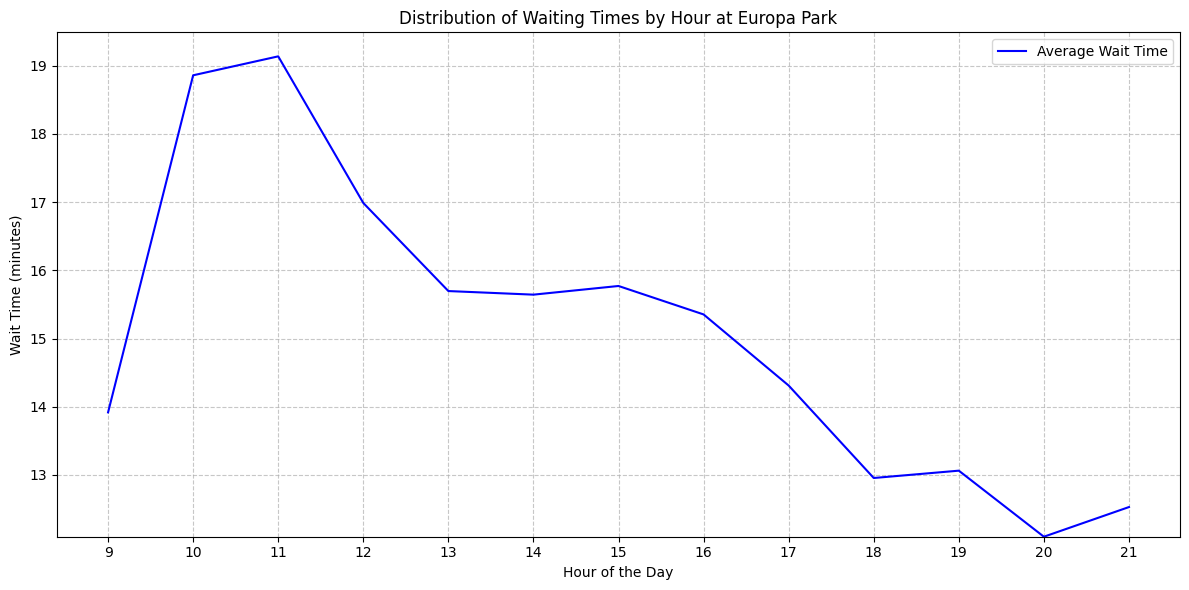

In [13]:
df_europapark_filtered = df_europapark[(df_europapark["wait_time"] > 1) | ((df_europapark["wait_time"] == 0) & (df_europapark["closed"] == False))]
df_europapark_filtered['hour'] = df_europapark_filtered['timestamp'].dt.hour
daily_wait_times = df_europapark_filtered.groupby('hour')['wait_time_rounded'].agg(['max', 'min', 'mean'])

first_hour = daily_wait_times.index.min()
last_hour = daily_wait_times.index.max()

min_wait_time = daily_wait_times['mean'].min()

plt.figure(figsize=(12, 6))
plt.plot(daily_wait_times.index, daily_wait_times['mean'], label='Average Wait Time', color='blue')

plt.title('Distribution of Waiting Times by Hour at Europa Park')
plt.xlabel('Hour of the Day')
plt.ylabel('Wait Time (minutes)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(first_hour, last_hour + 1))
plt.ylim(bottom=min_wait_time)
plt.tight_layout()
plt.show()



/tmp/ipykernel_4434/1890730587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europapark_filtered["hour"] = df_europapark_filtered["timestamp"].dt.hour
/tmp/ipykernel_4434/1890730587.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europapark_filtered["wait_time_bin"] = df_europapark_filtered["ride_name"].map(ride_bins)


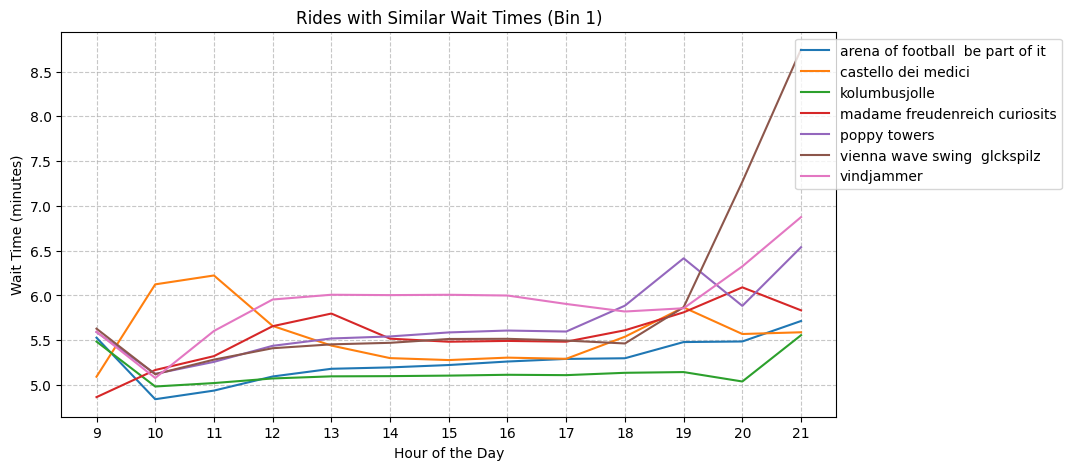

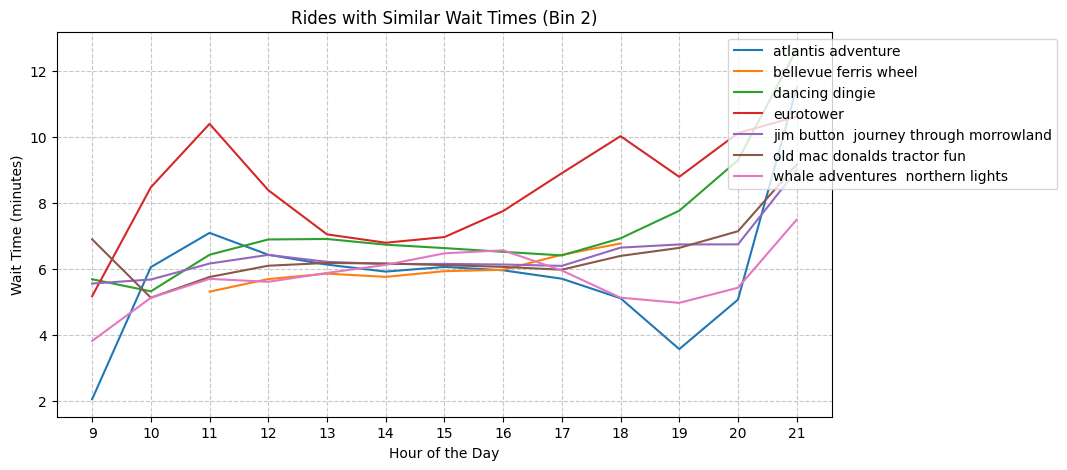

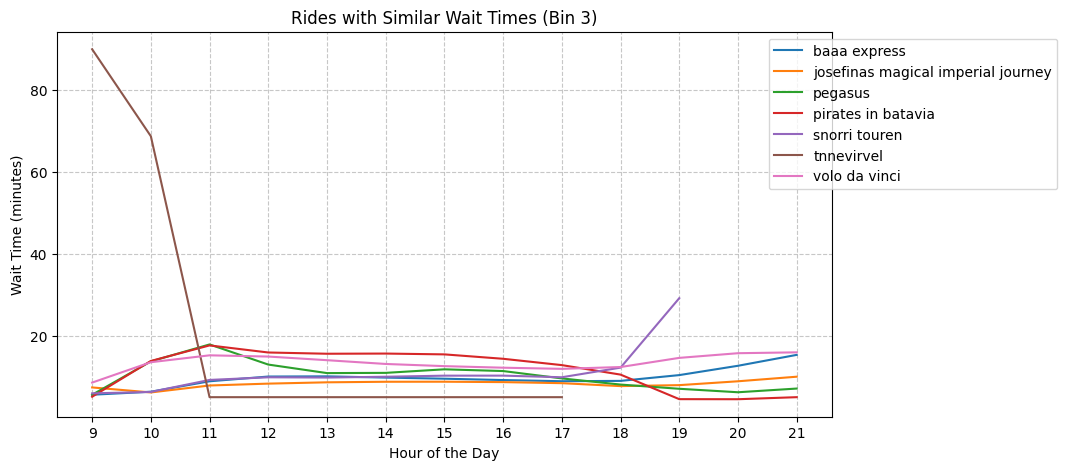

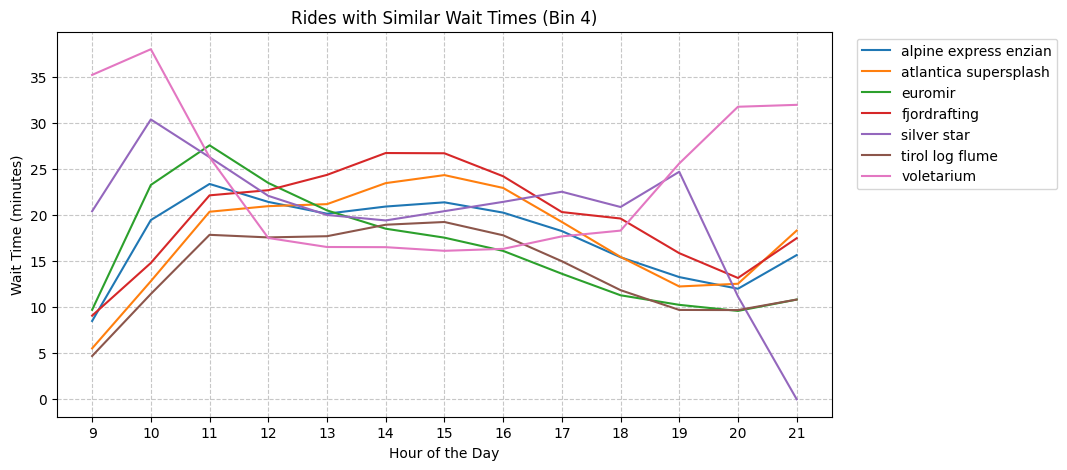

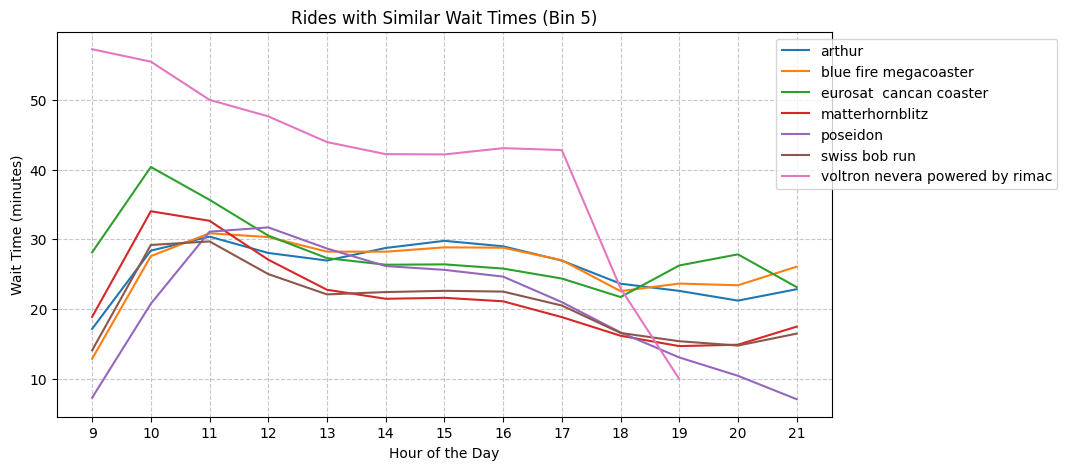

In [14]:

df_europapark["timestamp"] = pd.to_datetime(df_europapark["timestamp"])

df_europapark_filtered = df_europapark[(df_europapark["wait_time"] > 1) | ((df_europapark["wait_time"] == 0) & (df_europapark["closed"] == False))]
df_europapark_filtered["hour"] = df_europapark_filtered["timestamp"].dt.hour

average_wait_per_ride = df_europapark_filtered.groupby("ride_name")["wait_time_rounded"].mean()

num_bins = 5
percentiles = np.linspace(0, 100, num_bins + 1)
bin_edges = np.percentile(average_wait_per_ride, percentiles)

ride_bins = pd.cut(average_wait_per_ride, bins=bin_edges, labels=[f"Bin {i+1}" for i in range(num_bins)], include_lowest=True)

df_europapark_filtered["wait_time_bin"] = df_europapark_filtered["ride_name"].map(ride_bins)

average_per_ride = df_europapark_filtered.groupby(["hour", "ride_name"])["wait_time_rounded"].mean().unstack()

first_hour = average_per_ride.index.min()
last_hour = average_per_ride.index.max()

for bin_label in ride_bins.cat.categories:
    rides_in_bin = average_wait_per_ride[ride_bins == bin_label].index
    if not rides_in_bin.empty:
        plt.figure(figsize=(10, 5))
        for ride in rides_in_bin:
            if ride in average_per_ride.columns:
                plt.plot(average_per_ride.index, average_per_ride[ride], label=ride)

        plt.title(f'Rides with Similar Wait Times ({bin_label})')
        plt.xlabel('Hour of the Day')
        plt.ylabel('Wait Time (minutes)')
        plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(range(first_hour, last_hour + 1))
        plt.show()


### Tnnevirvel

/tmp/ipykernel_4434/1098165722.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ride = df_ride[(df_europapark["wait_time"] > 1) | ((df_europapark["wait_time"] == 0) & (df_europapark["closed"] == False))]


count    169.000000
mean      12.041420
std       23.499077
min        5.000000
25%        5.000000
50%        5.000000
75%        5.000000
max       90.000000
Name: wait_time_rounded, dtype: float64

Potential Outliers:
          ride_name           timestamp  wait_time  closed  temperature  rain  \
9541577  tnnevirvel 2022-06-29 09:20:00       91.0   False         20.4   0.0   
9541612  tnnevirvel 2022-06-29 09:25:00       91.0   False         20.4   0.0   
9541646  tnnevirvel 2022-06-29 09:30:00       91.0   False         20.4   0.0   
9541679  tnnevirvel 2022-06-29 09:35:00       91.0   False         20.4   0.0   
9541717  tnnevirvel 2022-06-29 09:40:00       91.0   False         20.4   0.0   
9541751  tnnevirvel 2022-06-29 09:45:00       91.0   False         20.4   0.0   
9541787  tnnevirvel 2022-06-29 09:50:00       91.0   False         20.4   0.0   
9541822  tnnevirvel 2022-06-29 09:55:00       91.0   False         20.4   0.0   
9541856  tnnevirvel 2022-06-29 10:00:00       91.0

/tmp/ipykernel_4434/1098165722.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_ride["hour"], y=df_ride["wait_time_rounded"], palette="coolwarm")


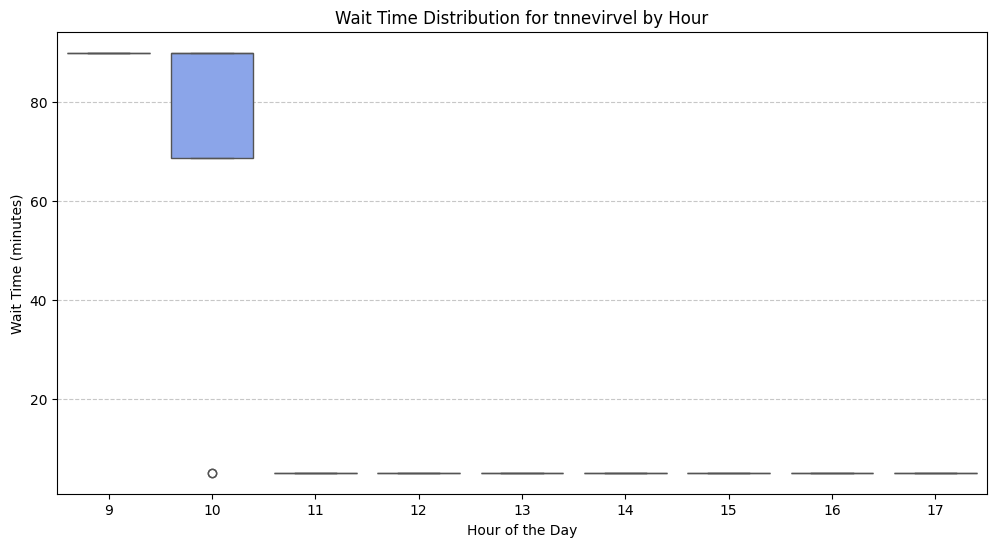

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


df_europapark["timestamp"] = pd.to_datetime(df_europapark["timestamp"])

ride_name = "tnnevirvel"
df_ride = df_europapark[df_europapark["ride_name"] == ride_name].copy()
df_ride = df_ride[(df_europapark["wait_time"] > 1) | ((df_europapark["wait_time"] == 0) & (df_europapark["closed"] == False))]
df_ride["hour"] = df_ride["timestamp"].dt.hour

print(df_ride["wait_time_rounded"].describe())

q1 = df_ride["wait_time_rounded"].quantile(0.25)
q3 = df_ride["wait_time_rounded"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_ride[(df_ride["wait_time_rounded"] < lower_bound) | (df_ride["wait_time_rounded"] > upper_bound)]
print("\nPotential Outliers:")
print(outliers)

mean_wait_by_hour = df_ride.groupby("hour")["wait_time_rounded"].mean()
print("\nMean Wait Time by Hour:")
print(mean_wait_by_hour)

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_ride["hour"], y=df_ride["wait_time_rounded"], palette="coolwarm")

plt.title(f'Wait Time Distribution for {ride_name} by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Wait Time (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


/tmp/ipykernel_4434/2344935106.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europapark_filtered["day_of_year"] = df_europapark_filtered["timestamp"].dt.day_of_year
/tmp/ipykernel_4434/2344935106.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europapark_filtered["wait_time_bin"] = df_europapark_filtered["ride_name"].map(ride_bins)


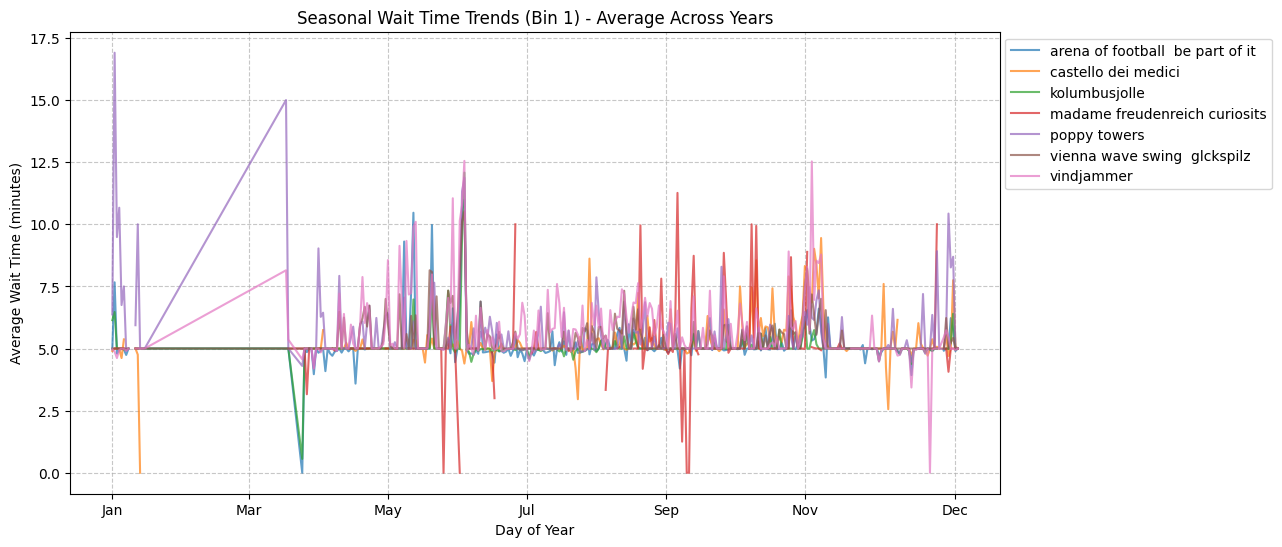

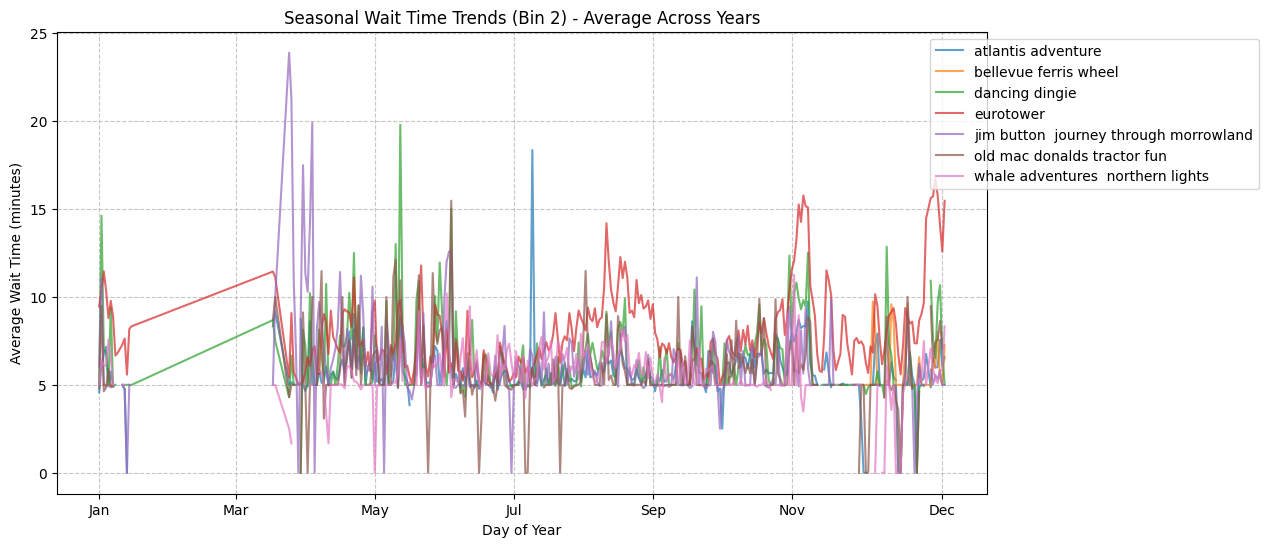

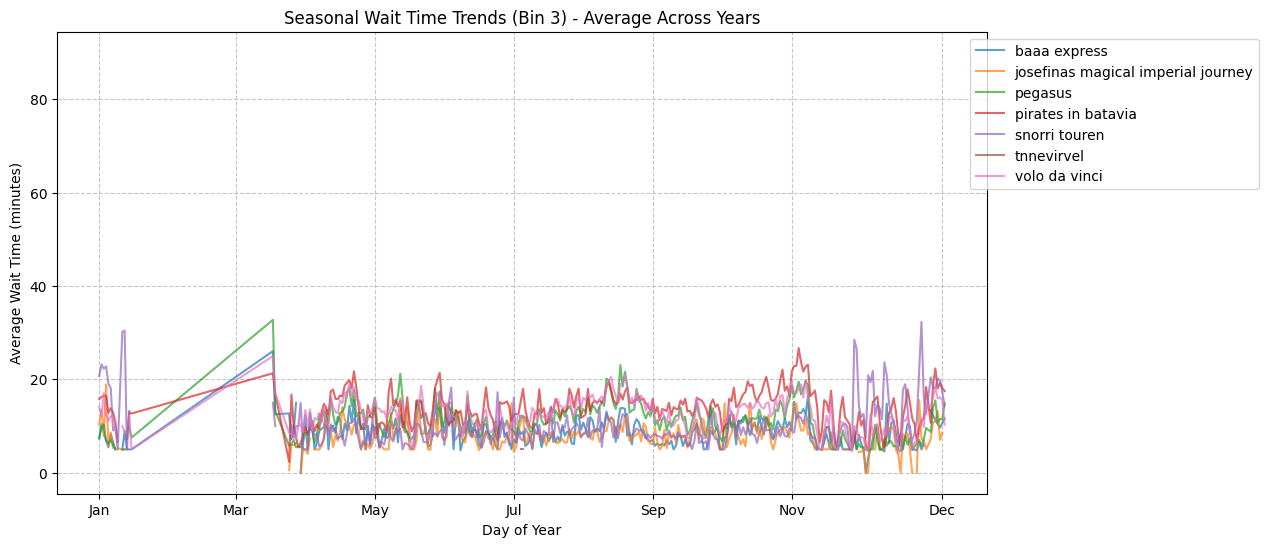

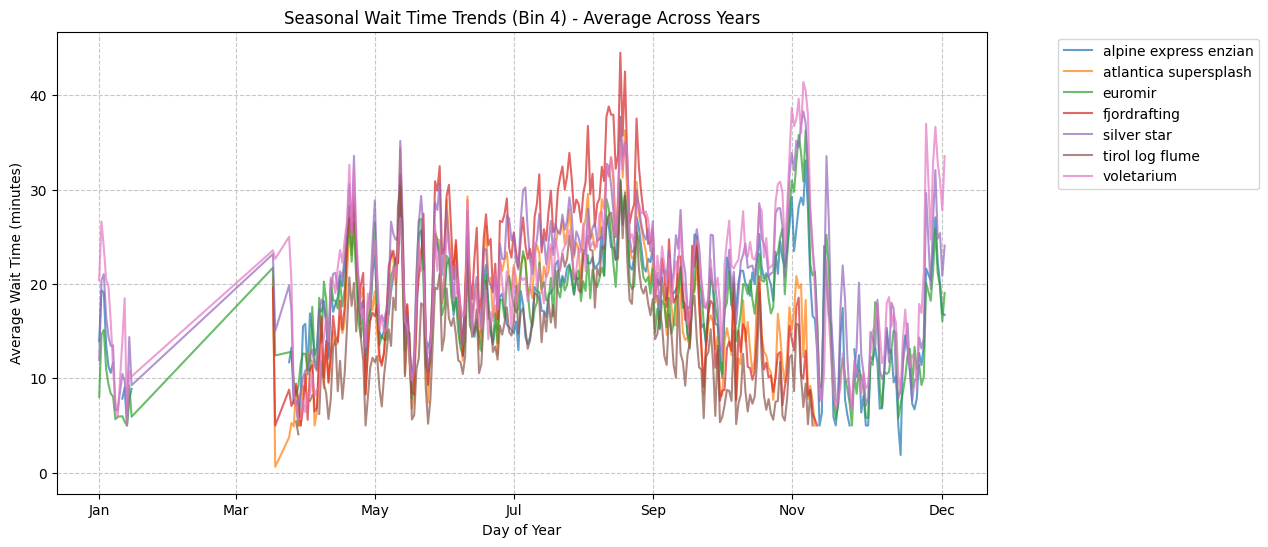

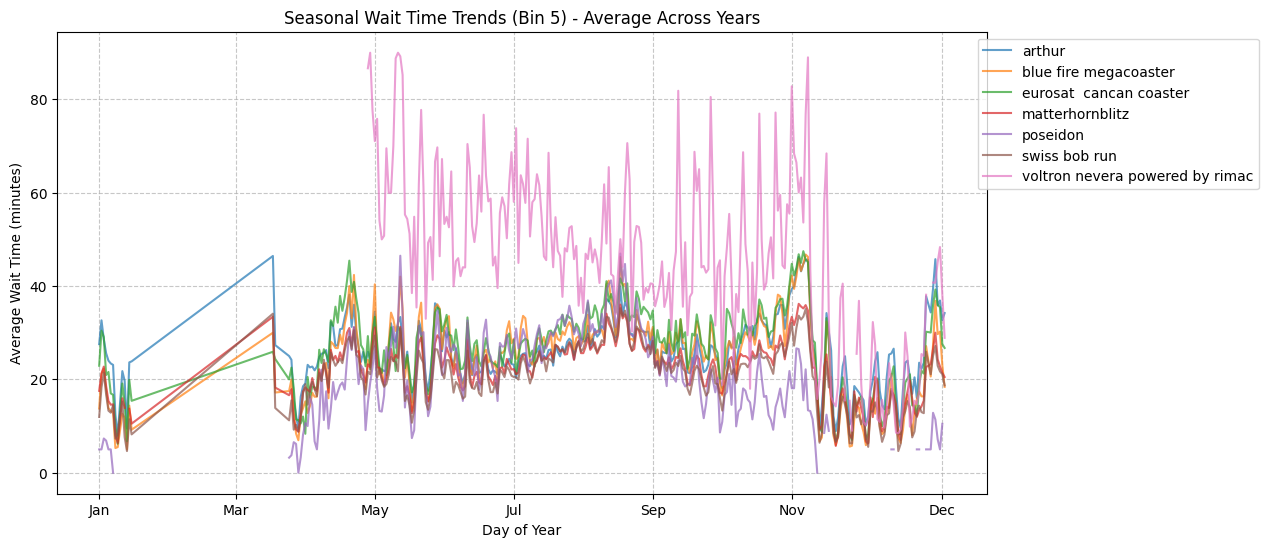

In [16]:
df_europapark["timestamp"] = pd.to_datetime(df_europapark["timestamp"])

df_europapark_filtered = df_europapark[
    (df_europapark["wait_time"] > 1) | ((df_europapark["wait_time"] == 0) & (df_europapark["closed"] == False))
]
df_europapark_filtered["day_of_year"] = df_europapark_filtered["timestamp"].dt.day_of_year

average_wait_per_ride = df_europapark_filtered.groupby("ride_name")["wait_time_rounded"].mean()

num_bins = 5
percentiles = np.linspace(0, 100, num_bins + 1)
bin_edges = np.percentile(average_wait_per_ride, percentiles)
ride_bins = pd.cut(average_wait_per_ride, bins=bin_edges, labels=[f"Bin {i+1}" for i in range(num_bins)], include_lowest=True)

df_europapark_filtered["wait_time_bin"] = df_europapark_filtered["ride_name"].map(ride_bins)

average_per_day_of_year = df_europapark_filtered.groupby(["day_of_year", "ride_name"])["wait_time_rounded"].mean().unstack()

for bin_label in ride_bins.cat.categories:
    rides_in_bin = average_wait_per_ride[ride_bins == bin_label].index
    if not rides_in_bin.empty:
        plt.figure(figsize=(12, 6))
        for ride in rides_in_bin:
            if ride in average_per_day_of_year.columns:
                plt.plot(average_per_day_of_year.index, average_per_day_of_year[ride], label=ride, alpha=0.7)

        plt.title(f'Seasonal Wait Time Trends ({bin_label}) - Average Across Years')
        plt.xlabel('Day of Year')
        plt.ylabel('Average Wait Time (minutes)')
        plt.xticks([1, 60, 120, 180, 240, 300, 365], ['Jan', 'Mar', 'May', 'Jul', 'Sep', 'Nov', 'Dec'])  # Approximate months
        plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()


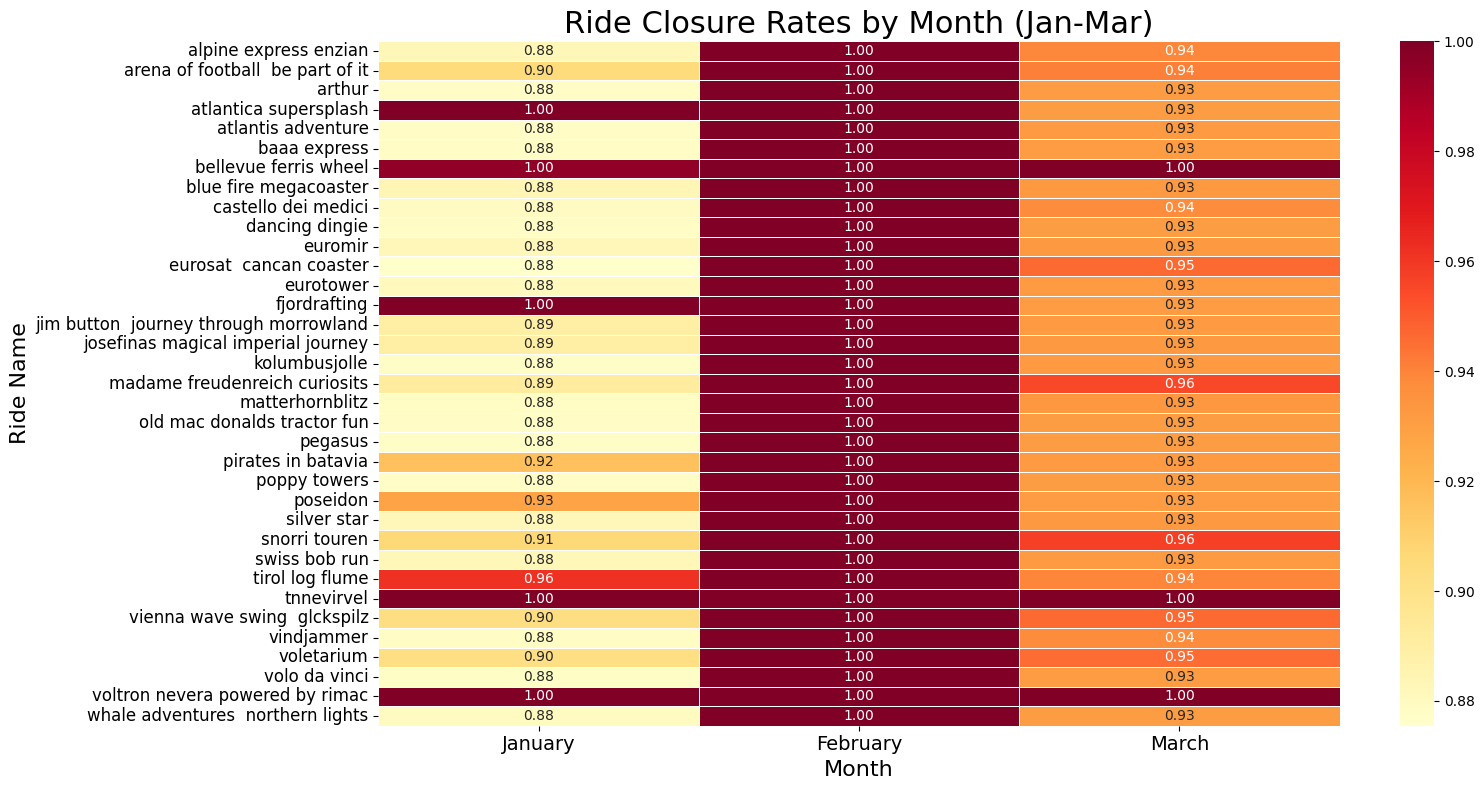

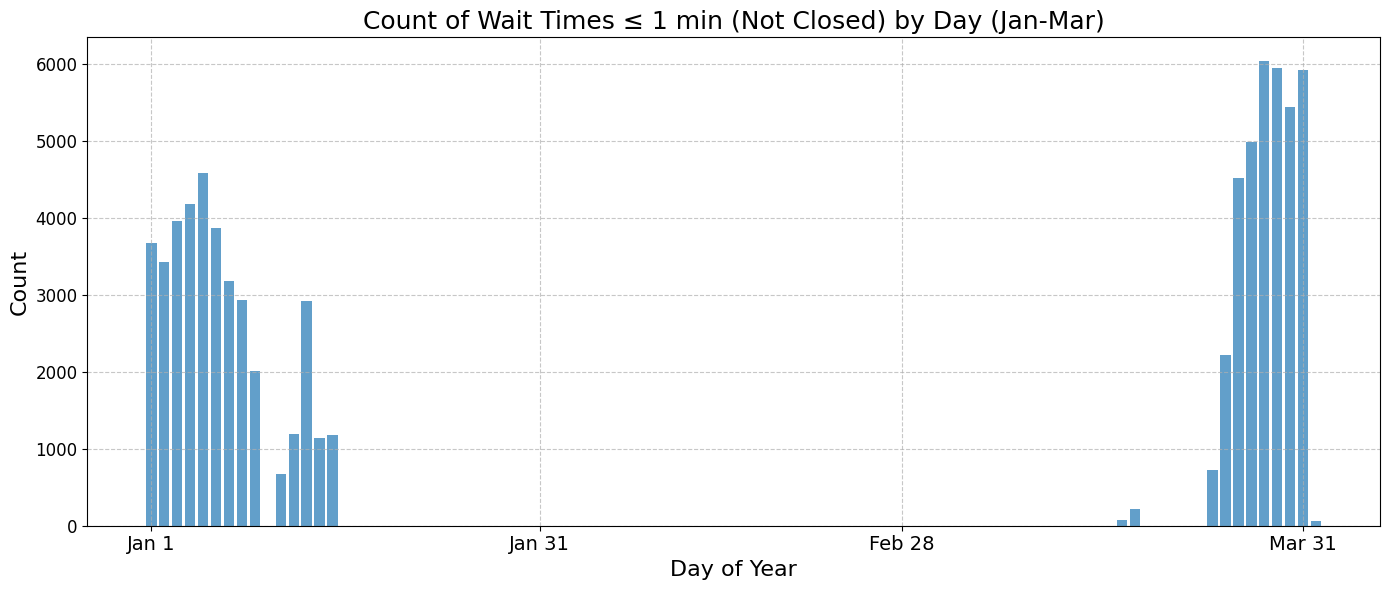

In [31]:
df_europapark["timestamp"] = pd.to_datetime(df_europapark["timestamp"])
df_europapark["month"] = df_europapark["timestamp"].dt.month
df_europapark["year"] = df_europapark["timestamp"].dt.year
df_europapark["day"] = df_europapark["timestamp"].dt.day
df_europapark["day_of_year"] = df_europapark["timestamp"].dt.dayofyear
winter_data = df_europapark[df_europapark["month"].isin([1, 2, 3])]
monthly_closures = winter_data.groupby(["month", "ride_name"])["closed"].mean().reset_index()
monthly_closures = monthly_closures.rename(columns={"closed": "closure_rate"})

# First plot - Heatmap with larger fonts
fig = plt.figure(figsize=(16, 8))
pivot_closures = monthly_closures.pivot(index="ride_name", columns="month", values="closure_rate")
sns.heatmap(pivot_closures, cmap="YlOrRd", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Ride Closure Rates by Month (Jan-Mar)", fontsize=22)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Ride Name", fontsize=16) 
plt.yticks(rotation=0, fontsize=12)  # Y-axis tick labels
plt.xticks([0.5, 1.5, 2.5], ["January", "February", "March"], fontsize=14)
plt.tight_layout()
plt.show()
# fig.savefig("jan_mar_closure_rates.svg")

# Prepare data for second plot
zero_wait_nonzero = winter_data[(winter_data["wait_time"] <= 1) & (winter_data["closed"] == False)]
zero_wait_daily = zero_wait_nonzero.groupby("day_of_year").size()
zero_wait_daily = zero_wait_daily.reset_index(name="count")

# Second plot - Bar chart with larger fonts
plt.figure(figsize=(14, 6))
plt.bar(zero_wait_daily["day_of_year"], zero_wait_daily["count"], alpha=0.7)
plt.title("Count of Wait Times ≤ 1 min (Not Closed) by Day (Jan-Mar)", fontsize=18)
plt.xlabel("Day of Year", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks([1, 31, 59, 90], ["Jan 1", "Jan 31", "Feb 28", "Mar 31"], fontsize=14)
plt.yticks(fontsize=12)  # Y-axis tick labels
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

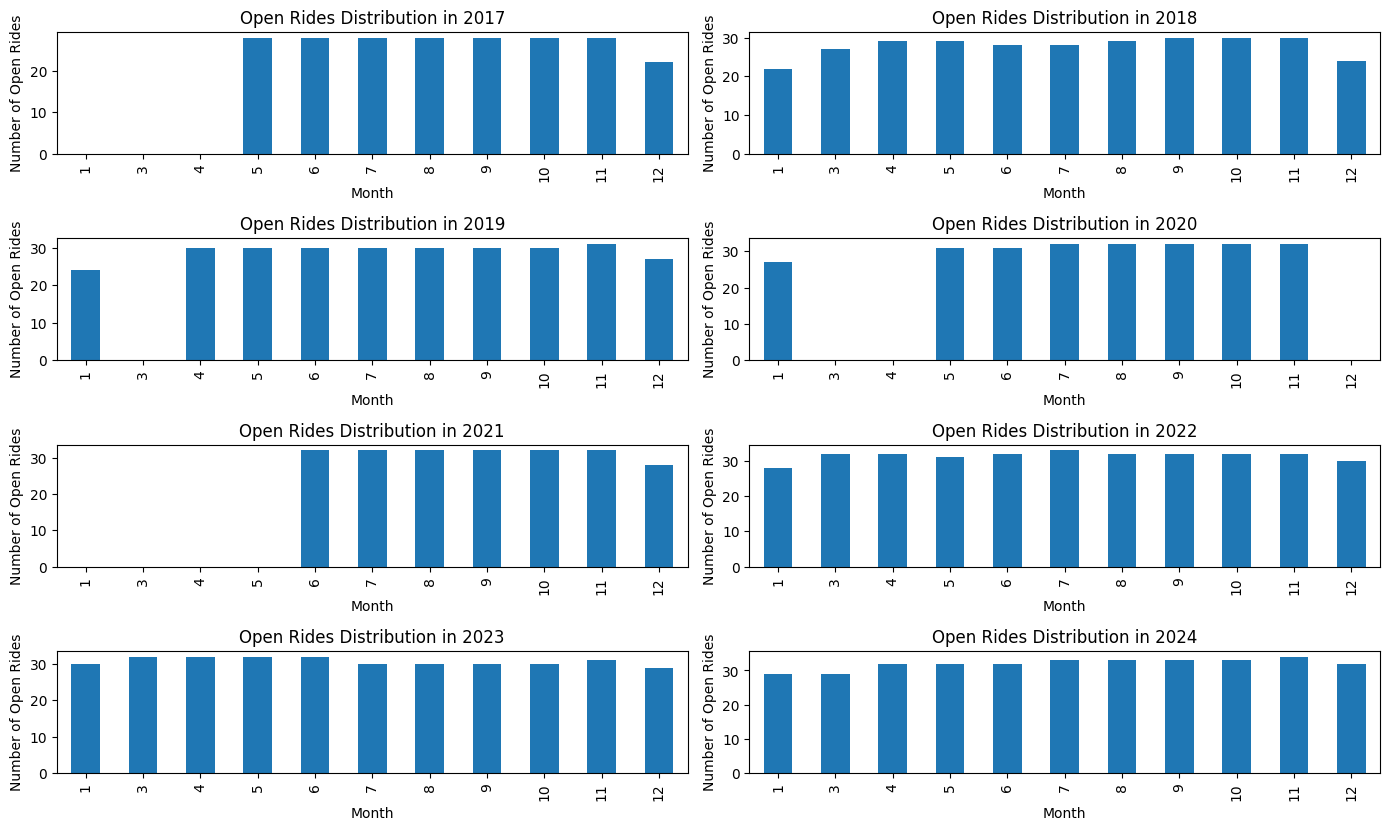

In [17]:

df_europapark['timestamp'] = pd.to_datetime(df_europapark['timestamp'])


df_europapark['year'] = df_europapark['timestamp'].dt.year
df_europapark['month'] = df_europapark['timestamp'].dt.month

df_open_rides = df_europapark[df_europapark['closed'] == False]

# Count unique rides that were open each month
rides_per_month = df_open_rides.groupby(['year', 'month'])['ride_name'].nunique().unstack(level=0)

# Plot
fig, axes = plt.subplots(nrows=rides_per_month.shape[1] // 2 + 1, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, year in enumerate(rides_per_month.columns):
    ax = axes[i]
    rides_per_month[year].plot(kind='bar', ax=ax)
    ax.set_title(f'Open Rides Distribution in {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Open Rides')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


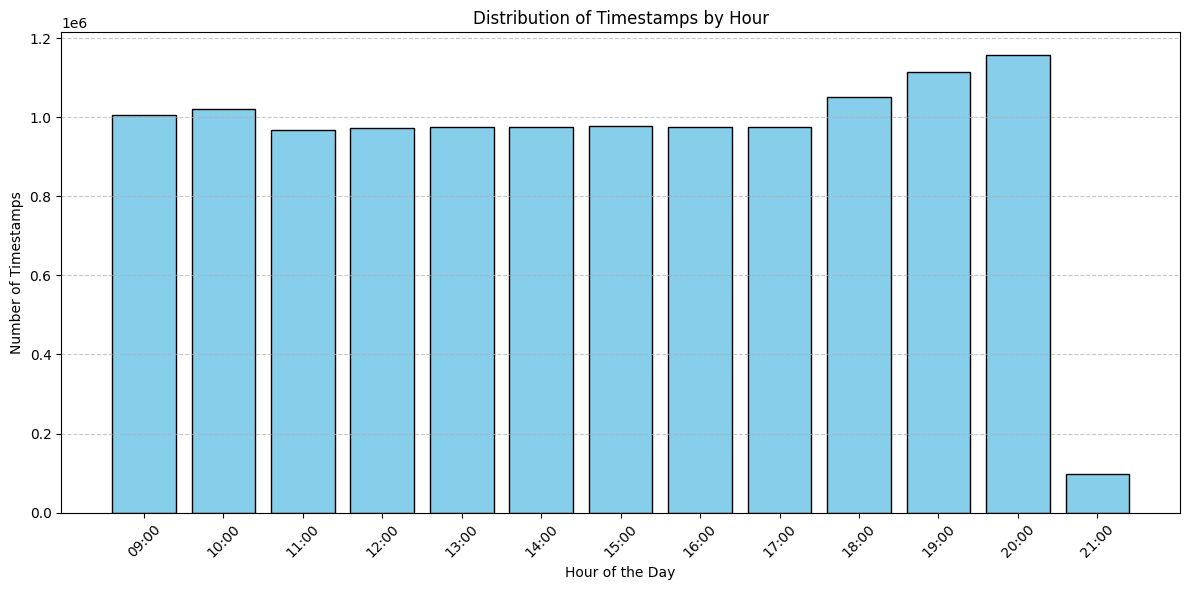

Hourly Distribution:
9     1005328
10    1020607
11     968999
12     973858
13     975553
14     975843
15     977615
16     975311
17     975862
18    1051056
19    1113643
20    1157044
21      97136
dtype: int64


In [18]:
df_europapark['hour'] = df_europapark['timestamp'].dt.hour

hourly_distribution = df_europapark['hour'].value_counts().sort_index()

full_hour_range = pd.Series(0, index=range(9, 22)) 
hourly_distribution = full_hour_range.add(hourly_distribution, fill_value=0).astype(int) 

hours_list = hourly_distribution.index.tolist()

plt.figure(figsize=(12, 6))
plt.bar(hours_list, hourly_distribution, color='skyblue', edgecolor='black')

plt.title('Distribution of Timestamps by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Timestamps')

plt.xticks(ticks=hours_list, labels=[f"{h:02d}:00" for h in hours_list], rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Hourly Distribution:")
print(hourly_distribution)


<Figure size 1200x600 with 0 Axes>

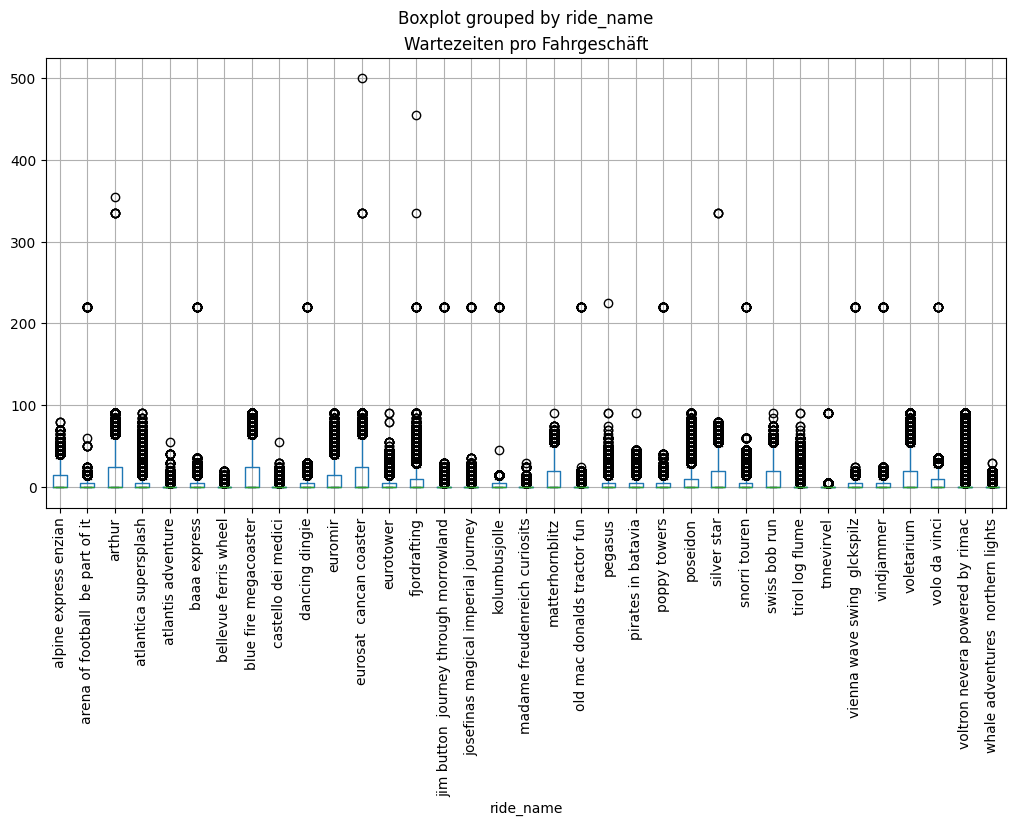

In [19]:
plt.figure(figsize=(12, 6))
df_europapark.boxplot(column='wait_time_rounded', by='ride_name', figsize=(12, 6))
plt.title('Wartezeiten pro Fahrgeschäft')
plt.xticks(rotation=90)
plt.show()


There are some outliers but those between 200 and 300 seem to be systematic so we'll dive deeper into that

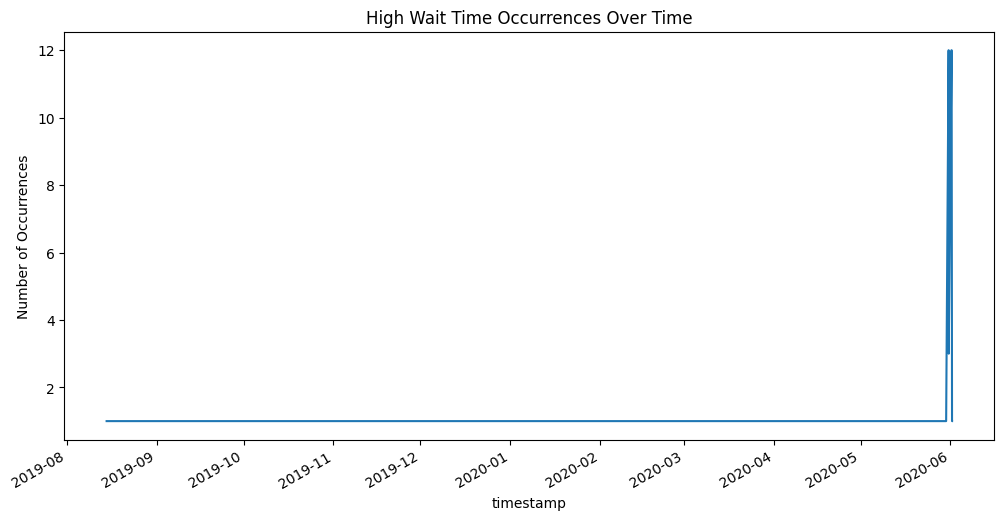

/tmp/ipykernel_4434/3310050662.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_times_200_300['date'] = df_times_200_300['timestamp'].dt.date


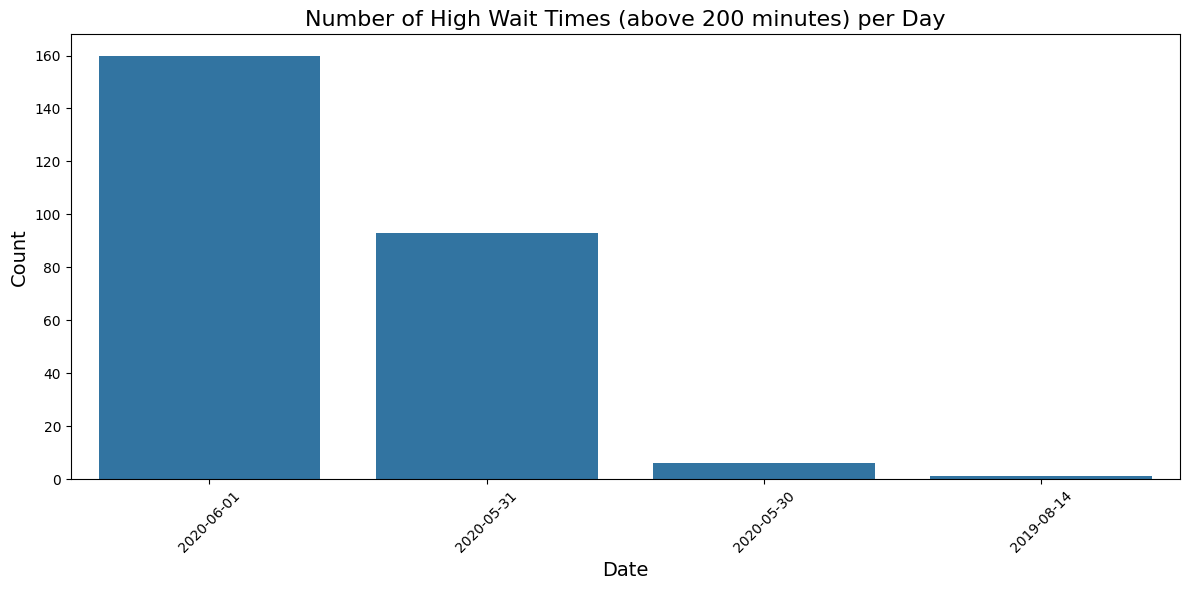

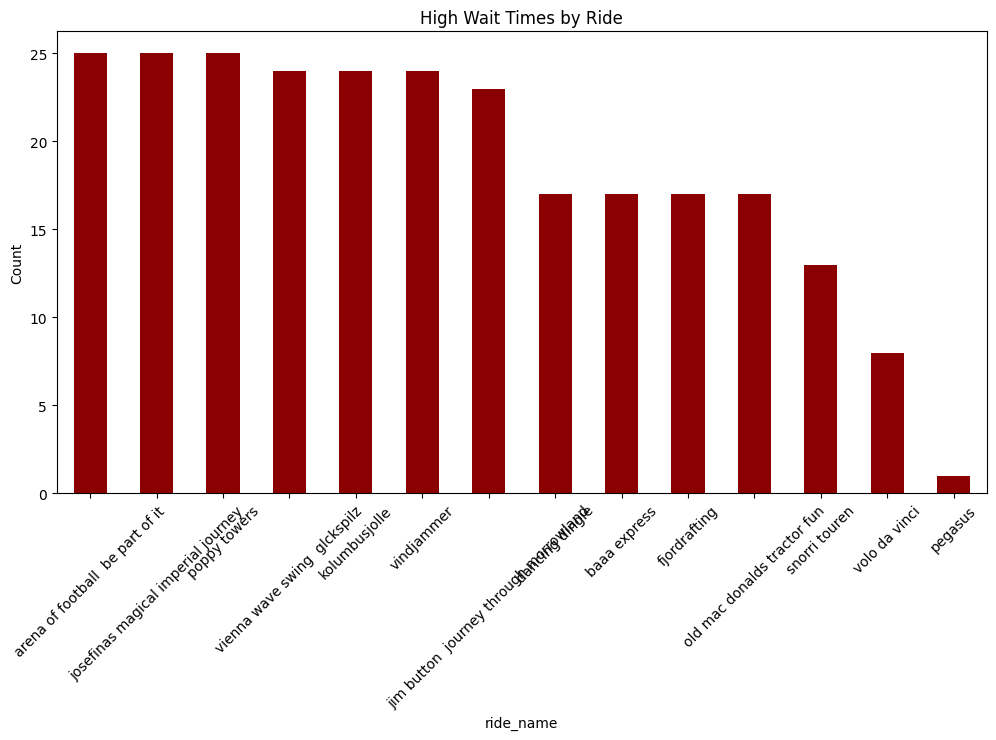

In [29]:
df_times_200_300 = df_europapark[(df_europapark['wait_time_rounded'] >= 200) & (df_europapark['wait_time_rounded'] <= 300)]

# 1. Temporal Distribution
plt.figure(figsize=(12, 6))
df_times_200_300.groupby('timestamp').size().plot(title='High Wait Time Occurrences Over Time')
plt.ylabel('Number of Occurrences')
plt.show()

# 2 Day Specific . 
df_times_200_300['date'] = df_times_200_300['timestamp'].dt.date
daily_counts = df_times_200_300.groupby('date').size().reset_index(name='count')

daily_counts = daily_counts.sort_values('count', ascending=False)

fig = plt.figure(figsize=(12, 6))
sns.barplot(x='date', y='count', data=daily_counts)
plt.title('Number of High Wait Times (above 200 minutes) per Day', fontdict={'fontsize': 16})
plt.xlabel('Date', fontdict={'fontsize': 14})
plt.ylabel('Count', fontdict={'fontsize': 14})
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
fig.savefig("high_wait_times_per_day.svg")

# 3. Ride-Specific Analysis
plt.figure(figsize=(12, 6))
df_times_200_300['ride_name'].value_counts().plot(kind='bar', color='darkred')
plt.title('High Wait Times by Ride')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

2020-05-30 until 2020-06-01 seems to be a irregularity and can probably be removed. Due to this being covid we should check the entire timespan of covid on how much it differs from the average

# Boxplots without outliers

Total rows: 12267855
Rows after filtering: 12267578
Rows lost: 277
Percentage of data lost: 0.00%


<Figure size 1200x600 with 0 Axes>

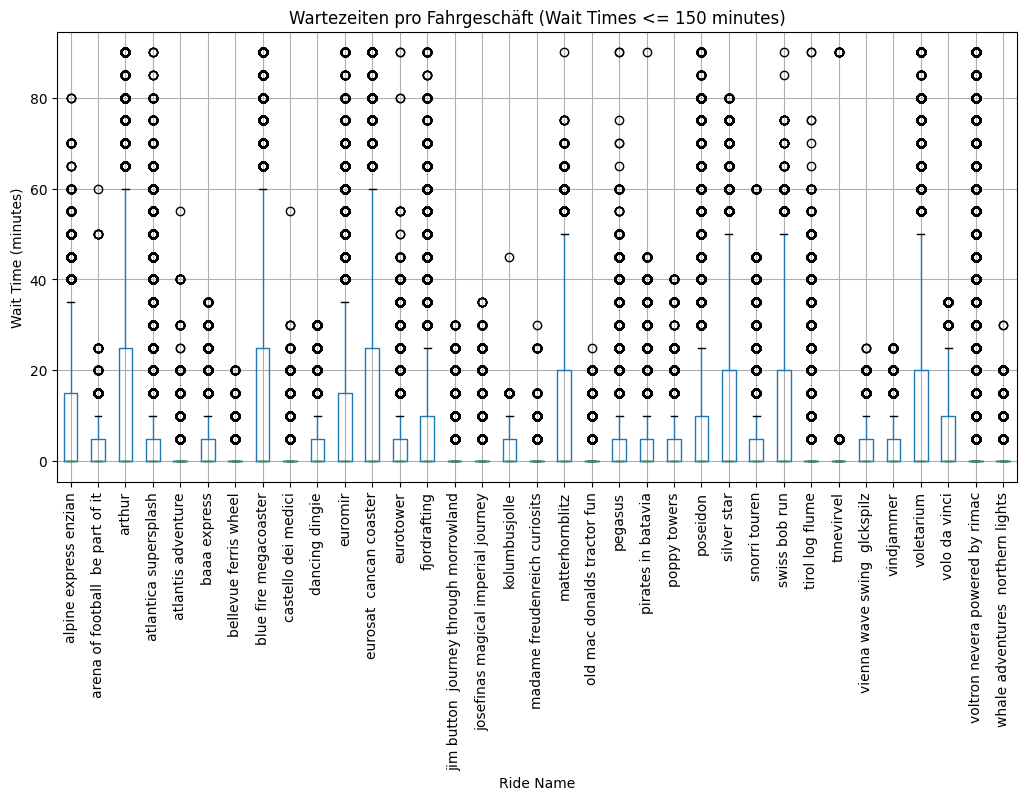

In [21]:

df_filtered = df_europapark[df_europapark['wait_time_rounded'] <= 150]

total_rows = len(df_europapark)
filtered_rows = len(df_filtered)
lost_rows = total_rows - filtered_rows
percentage_lost = (lost_rows / total_rows) * 100

print(f"Total rows: {total_rows}")
print(f"Rows after filtering: {filtered_rows}")
print(f"Rows lost: {lost_rows}")
print(f"Percentage of data lost: {percentage_lost:.2f}%")

# Create the box plot
plt.figure(figsize=(12, 6))
df_filtered.boxplot(column='wait_time_rounded', by='ride_name', figsize=(12, 6))
plt.title('Wartezeiten pro Fahrgeschäft (Wait Times <= 150 minutes)')
plt.suptitle('') 
plt.xticks(rotation=90)
plt.xlabel('Ride Name')
plt.ylabel('Wait Time (minutes)')
plt.show()


In [22]:
df_europapark['date'] = df_europapark['timestamp'].dt.date
opening_closing_times = df_europapark.groupby('date')['timestamp'].agg(['min', 'max'])
opening_closing_times

,min,max
date,,
2017-05-23,2017-05-23 09:00:00,2017-05-23 21:00:00
2017-05-24,2017-05-24 09:00:00,2017-05-24 21:00:00
2017-05-25,2017-05-25 09:00:00,2017-05-25 21:00:00
2017-05-26,2017-05-26 09:00:00,2017-05-26 21:00:00
2017-05-27,2017-05-27 09:00:00,2017-05-27 21:00:00
...,...,...
2024-12-27,2024-12-27 09:00:00,2024-12-27 21:00:00
2024-12-28,2024-12-28 09:00:00,2024-12-28 21:00:00
2024-12-29,2024-12-29 09:00:00,2024-12-29 21:00:00


# Covid

Comparison of Wait Times:
                       count       mean   50%    max
COVID Period             0.0        NaN   NaN    NaN
Normal Operations  3776997.0  16.046068  10.0  500.0


TypeError: no numeric data to plot

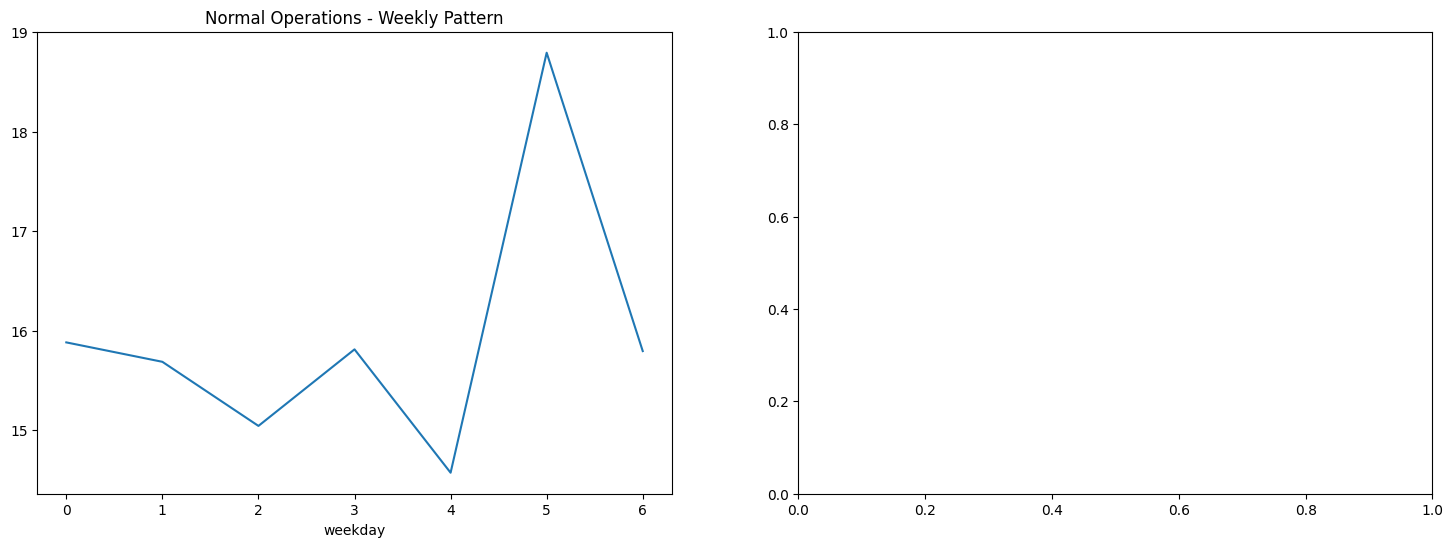

In [23]:

covid_start = '2020-12-01'
covid_end = '2021-05-01'


df_filtered = df_europapark[(df_europapark["wait_time"] > 1) | ((df_europapark["wait_time"] == 0) & (df_europapark["closed"] == False))].copy()
df_filtered['timestamp'] = pd.to_datetime(df_filtered['timestamp'])
df_filtered['weekday'] = df_filtered['timestamp'].dt.weekday
df_filtered['hour'] = df_filtered['timestamp'].dt.hour

covid_mask = (df_filtered['timestamp'] >= covid_start) & (df_filtered['timestamp'] <= covid_end)

df_covid = df_filtered[covid_mask]
df_normal = df_filtered[~covid_mask]


covid_stats = df_covid['wait_time_rounded'].describe()
normal_stats = df_normal['wait_time_rounded'].describe()

comparison = pd.DataFrame({
    'COVID Period': covid_stats,
    'Normal Operations': normal_stats
}).T[['count', 'mean', '50%', 'max']]

print("Comparison of Wait Times:")
print(comparison)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Weekday analysis
pd.pivot_table(df_normal, index='weekday', values='wait_time_rounded', aggfunc='mean').plot(
    ax=ax[0], title='Normal Operations - Weekly Pattern', legend=False)
pd.pivot_table(df_covid, index='weekday', values='wait_time_rounded', aggfunc='mean').plot(
    ax=ax[0], linestyle='--')
ax[0].set_xticks(range(7))
ax[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax[0].set_ylabel('Average Wait Time (minutes)')

# Hourly analysis
pd.pivot_table(df_normal, index='hour', values='wait_time_rounded', aggfunc='mean').plot(
    ax=ax[1], title='Normal vs COVID Hourly Patterns')
pd.pivot_table(df_covid, index='hour', values='wait_time_rounded', aggfunc='mean').plot(
    ax=ax[1], linestyle='--')
ax[1].legend(['Normal Operations', 'COVID Regulations'])
ax[1].set_ylabel('Average Wait Time (minutes)')

plt.tight_layout()
plt.show()


In [ ]:
df_covid["wait_time_rounded"].value_counts().sort_index()

wait_time_rounded
5      164710
10      46926
15      38813
20      35375
25      25361
30      20302
35      14462
40      10566
45       5796
50       3125
55        804
60        731
65        107
70         83
75         14
80         14
85         44
90        162
220       259
335        13
Name: count, dtype: int64

In [ ]:
df_normal["wait_time_rounded"].value_counts().sort_index()

wait_time_rounded
5      1341624
10      442529
15      351854
20      337804
25      254956
30      207657
35      160653
40      114811
45       73053
50       46627
55       20228
60       17434
65        6302
70        6128
75        2223
80        2278
85         653
90        2704
225          1
335          1
355          1
455          1
500          1
Name: count, dtype: int64

# Weather

/tmp/ipykernel_57481/2633132586.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_wait_temp = df_europapark.groupby('temperature_bin')['wait_time'].mean()
/tmp/ipykernel_57481/2633132586.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_wait_rain = df_europapark.groupby('rain_bin')['wait_time'].mean()
/tmp/ipykernel_57481/2633132586.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_wait_wind = df_eur

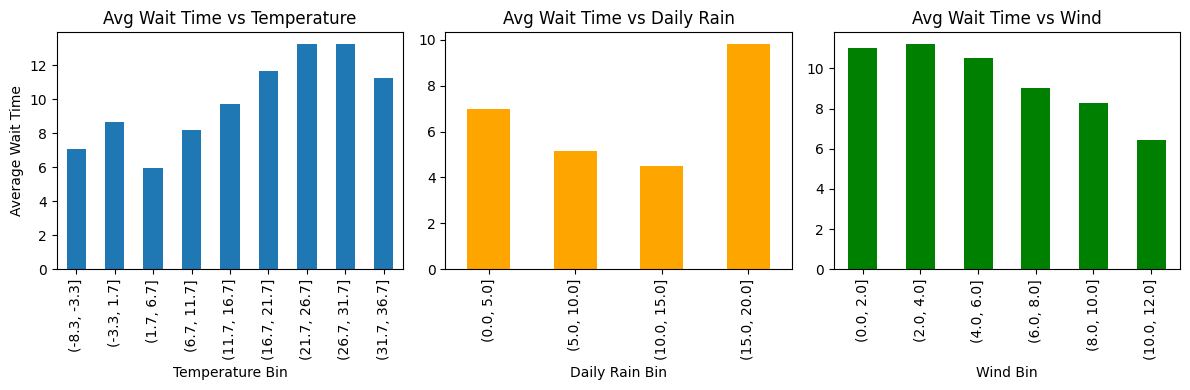

In [ ]:
df_europapark['timestamp'] = pd.to_datetime(df_europapark['timestamp'])
df_europapark['date'] = df_europapark['timestamp'].dt.date
df_europapark['hour'] = df_europapark['timestamp'].dt.hour

daily_rain = df_europapark.groupby(['date', 'hour'])['rain'].mean().reset_index()
daily_rain = daily_rain.groupby('date')['rain'].sum().reset_index()

df_europapark = df_europapark.merge(daily_rain, on='date', suffixes=('', '_daily'))

temperature_bins = np.arange(df_europapark['temperature'].min(), df_europapark['temperature'].max(), 5)
rain_bins = np.arange(df_europapark['rain_daily'].min(), df_europapark['rain_daily'].max(), 5)
wind_bins = np.arange(df_europapark['wind'].min(), df_europapark['wind'].max(), 2)

df_europapark['temperature_bin'] = pd.cut(df_europapark['temperature'], bins=temperature_bins)
df_europapark['rain_bin'] = pd.cut(df_europapark['rain_daily'], bins=rain_bins)
df_europapark['wind_bin'] = pd.cut(df_europapark['wind'], bins=wind_bins)

avg_wait_temp = df_europapark.groupby('temperature_bin')['wait_time'].mean()
avg_wait_rain = df_europapark.groupby('rain_bin')['wait_time'].mean()
avg_wait_wind = df_europapark.groupby('wind_bin')['wait_time'].mean()

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
avg_wait_temp.plot(kind='bar')
plt.title('Avg Wait Time vs Temperature')
plt.xlabel('Temperature Bin')
plt.ylabel('Average Wait Time')

plt.subplot(1, 3, 2)
avg_wait_rain.plot(kind='bar', color='orange')
plt.title('Avg Wait Time vs Daily Rain')
plt.xlabel('Daily Rain Bin')

plt.subplot(1, 3, 3)
avg_wait_wind.plot(kind='bar', color='green')
plt.title('Avg Wait Time vs Wind')
plt.xlabel('Wind Bin')

plt.tight_layout()
plt.show()

In [ ]:
df_europapark["rain"].value_counts()

rain
0.00    3231790
0.01     305902
0.02     125110
0.10     120842
0.03      82727
         ...   
5.97        168
3.91        168
6.38        132
1.88        126
4.36         28
Name: count, Length: 224, dtype: int64

# Missing Values

In [7]:
df_europapark["feature_category"].unique

<bound method Series.unique of 0             family
1           children
2             thrill
3             family
4              water
              ...   
14196898       water
14196899        None
14196900      family
14196901      family
14196902      family
Name: feature_category, Length: 14196903, dtype: object>

In [5]:
missing_by_ride = df_europapark.groupby('ride_name').apply(lambda x: x.isnull().sum().sum())
missing_by_ride = missing_by_ride.sort_values(ascending=False)
print("MISSING VALUES BY RIDE:")
print(missing_by_ride)

missing_by_feature = df_europapark.isnull().sum().sort_values(ascending=False)
missing_by_feature = missing_by_feature[missing_by_feature > 0]  # Only show features with missing values
print("\nMISSING VALUES BY FEATURE:")
print(missing_by_feature)

print("\nDETAILED BREAKDOWN BY RIDE:")
for ride in df_europapark['ride_name'].unique():
    ride_data = df_europapark[df_europapark['ride_name'] == ride]
    missing_features = ride_data.isnull().sum()
    missing_features = missing_features[missing_features > 0]
    
    if len(missing_features) > 0:
        print(f"\n{ride}:")
        print(missing_features)

/tmp/ipykernel_37448/3148717042.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_ride = df_europapark.groupby('ride_name').apply(lambda x: x.isnull().sum().sum())


MISSING VALUES BY RIDE:
ride_name
bellevue ferris wheel                     4428847
eurosat  cancan coaster                   4347573
jim button  journey through morrowland    4295735
arena of football  be part of it          4282284
vienna wave swing  glckspilz              4261392
whale adventures  northern lights         4247209
voletarium                                1034716
poppy towers                              1028792
kolumbusjolle                             1027719
vindjammer                                1021924
old mac donalds tractor fun               1021709
volo da vinci                             1021380
eurotower                                 1020961
dancing dingie                            1020745
tnnevirvel                                 805908
voltron nevera powered by rimac            783117
snorri touren                              690771
pirates in batavia                         674770
tirol log flume                            662493
madame freudenre

In [6]:
import pandas as pd

# Get all feature columns (those that start with 'feature_')
feature_columns = [col for col in df_europapark.columns if col.startswith('feature_')]

# Check which rides have at least one missing feature value
missing_features_mask = df_europapark[feature_columns].isnull().any(axis=1)
rides_with_missing = df_europapark[missing_features_mask]

# Group by ride name and identify specific missing features
result = []
for ride_name in rides_with_missing['ride_name'].unique():
    ride_data = df_europapark[df_europapark['ride_name'] == ride_name]
    
    # Identify which features are missing for this ride
    missing_cols = []
    for col in feature_columns:
        if ride_data[col].isnull().any():
            missing_cols.append(col)
    
    if missing_cols:
        result.append({
            'ride_name': ride_name,
            'missing_features': missing_cols,
            'count': len(missing_cols)
        })

# Convert to DataFrame for better display
result_df = pd.DataFrame(result)
result_df = result_df.sort_values('count', ascending=False)

print("RIDES WITH MISSING FEATURE VALUES:")
print(result_df)

# Count by feature
feature_counts = {}
for ride in result:
    for feature in ride['missing_features']:
        feature_counts[feature] = feature_counts.get(feature, 0) + 1

print("\nMISSING COUNTS BY FEATURE:")
for feature, count in sorted(feature_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: missing in {count} rides")

RIDES WITH MISSING FEATURE VALUES:
                                 ride_name  \
1             vienna wave swing  glckspilz   
5                    bellevue ferris wheel   
4        whale adventures  northern lights   
12  jim button  journey through morrowland   
11                 eurosat  cancan coaster   
9         arena of football  be part of it   
2                               voletarium   
3                            volo da vinci   
0                             poppy towers   
6              old mac donalds tractor fun   
8                           dancing dingie   
7                               vindjammer   
10                               eurotower   
13                           kolumbusjolle   

                                                                                                                                                                             missing_features  \
1   [feature_attraction_type, feature_category, feature_max_height, feature_track

## Handle feature_* features

There are feature_* values missing for multiple rides. I checked them and it seems that it makes sense for those rides.

I propose to fill those Empty Values with the following:
- feature_track_length         0
- feature_max_speed            0
- feature_min_height           0
- feature_min_age              0
- feature_category             Other
- feature_g_force              0
- feature_max_height           0
- feature_attraction_type      Other
- feature_capacity_per_hour    0

## Handle missing values for "wait_time, rain, wind, temperature"

rain, wind, temperature -> Check if other rides have values for the same timestamp,
- Yes: Take those
- No: drop rows

wait_time -> drop rows where wait_time is empty